# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are 4 functions you need to complete to have a working project. These functions are described using the RE formula, which stands for Requires and Effects. Each function will have its own RE located directly above the function definition. The Requires section describes what is needed in the function argument (inbetween the function definition parenthesis). The Effects portion outlines what the function is supposed to do. 
5. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [3]:
import zipfile

from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
import math

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!
zf = zipfile.ZipFile('readonly/images.zip')

def generate_contact_sheet(thumbnails):
    """Takes an array of thumbnails and returns a contact sheet"""
    
    # Adjustable display option
    thumbnails_per_row = 5
    
    thumbnail_width = thumbnails[0].width
    thumbnail_height = thumbnails[0].height
    
    # Define the size of the contact sheet
    width = thumbnail_width*thumbnails_per_row
    height = math.ceil(len(thumbnails)/5)*thumbnail_height
    size = (width, height)
    
    # Create a blank contact sheet
    contact_sheet=Image.new('RGB', (size))
    
    # Paste the thumnnails to the contact sheet
    x = 0
    y = 0
    for thumb in thumbnails:
        contact_sheet.paste(thumb, (x, y))
        # Now we update our X position. If it is going to be the width of the image, then we set it to 0
        # and update Y as well to point to the next "line" of the contact sheet.
        if x+thumbnail_width == contact_sheet.width:
            x = 0
            y += thumbnail_height
        else:
            x += thumbnail_width
            
    return contact_sheet

def search_for_faces(file_name):
    """
    Searches the given file for faces and returns an array of bounding boxes
    that define the area in which a face was found. The returned bounding boxes
    are modified so that they work with PIL's coordinate system.
    """
    
    # Convert to gray scale
    img = cv.imread(file_name)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Search for faces
    faces = face_cascade.detectMultiScale(gray, 1.35)
    
    for box in faces:
        box[2] = box[0] + box[2]
        box[3] = box[1] + box[3]

    return faces

def generate_thumbnails(file_name, bounding_boxes):
    """
    Generates an array of thumbnails from the given filename and bounding boxes.
    Returns an array of thumbnails. 
    """
    
    # Define the thumbnail size
    size = (100,100)
    
    image = Image.open(file_name)
    
    images = []
    for box in bounding_boxes:
        images.append(image.crop((box[0],box[1],box[2],box[3])))
        
    for image in images:
        image.thumbnail(size)
    
    return images

def extract_text_from_image(file_name):
    """
    Returns a string of all the text found in the given image
    """
    
    text = pytesseract.image_to_string(Image.open(file_name))
    return text

def generate_searchable_dictionary():
    """
    Extracts text and face images from all of the provided files and puts 
    all of this info into a dictionary suitable for searching.
    Dictionary format is {'file_name': {'text': image_text, 'thumbnails': array of thumbnails}}
    """
    zf.extractall()
    file_names = zf.namelist()
    
    text_and_faces = {}
    for file_name in file_names:
        text_and_faces[file_name] = {}
        
    for file_name in file_names:
        text_and_faces[file_name]['text'] = extract_text_from_image(file_name)
        bounding_boxes = search_for_faces(file_name)
        text_and_faces[file_name]['thumbnails'] = generate_thumbnails(file_name, bounding_boxes)
        
    return text_and_faces

def search(string):
    file_names = zf.namelist()
    
    for file_name in file_names:
        if string.lower() in text_and_faces[file_name]['text'].lower():
            # We found a match.
            print('Results found in file {}'.format(file_name))
            if len(text_and_faces[file_name]['thumbnails']) > 0:
                # Display the contact sheet
                display(generate_contact_sheet(text_and_faces[file_name]['thumbnails']))
            else:
                print('But there were no faces in that file!')

In [4]:
text_and_faces = generate_searchable_dictionary()

Results found in file a-0.png


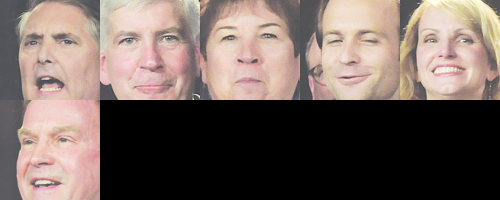

Results found in file a-1.png


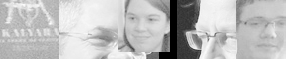

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-13.png


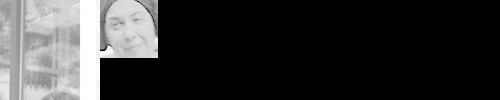

Results found in file a-2.png


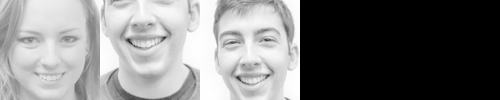

Results found in file a-3.png


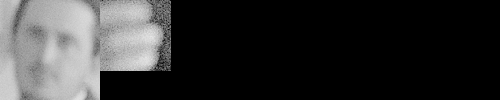

Results found in file a-5.png


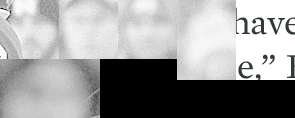

Results found in file a-8.png


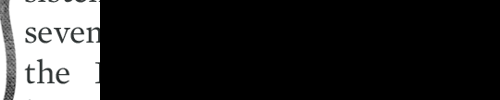

Results found in file a-9.png


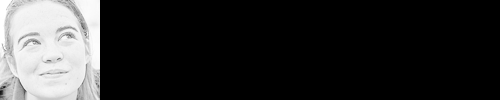

In [5]:
search('Mark')